click RUN ALL, results are displayed near the bottom

imports

In [41]:
import matplotlib
from matplotlib.lines import Line2D
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from numpy import count_nonzero
import time
import logging

iris = load_iris()

#notebook specific
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]


In [42]:
def show_default_scatter():
    """
    showcases ground truth of iris types
    :return: None
    """
    # create two 2d plots for showcasing ground truth - one for sepal attributes and one for petals
    fig = plt.figure()
    # sepal
    ax1 = fig.add_subplot(2, 2, 1, title="Scatter figure of Iris types based on sepal length and width",
                          xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
    ax1.scatter(iris.data[0:50, 0:1], iris.data[0:50, 1:2], marker="P", label="setosa")
    ax1.scatter(iris.data[50:100, 0:1], iris.data[50:100, 1:2], marker="*", label="versicolor")
    ax1.scatter(iris.data[100:150, 0:1], iris.data[100:150, 1:2], marker=".", label="virginica")
    ax1.legend()
    # petal
    ax2 = fig.add_subplot(2, 2, 3, title="Scatter figure of Iris types based on petal length and width",
                          xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
    ax2.scatter(iris.data[0:50, 2:3], iris.data[0:50, 3:4], marker="P", label="setosa")
    ax2.scatter(iris.data[50:100, 2:3], iris.data[50:100, 3:4], marker="*", label="versicolor")
    ax2.scatter(iris.data[100:150, 2:3], iris.data[100:150, 3:4], marker=".", label="virginica")
    ax2.legend()
    # fake 4d plot of all attributes - petal width is represented by color and size (marker size not comparable inter-species)
    # CMAP_COLOR = "copper"
    CMAP_COLOR = "winter"
    # CMAP_COLOR = "PiYG"
    # CMAP_COLOR = "coolwarm"
    GROWTH_FACTOR = 128
    ax3 = fig.add_subplot(1, 2, 2, projection="3d", xlabel=iris.feature_names[0],
                          ylabel=iris.feature_names[1], zlabel=iris.feature_names[2])
    ax3.set_title("Scatter figure of Iris types based on all 4 parameters \n (petal width represented by color)",
                  wrap=True, y=-0.3)
    ax3.scatter(iris.data[0:50, 0:1], iris.data[0:50, 1:2], iris.data[0:50, 2:3], c=iris.data[0:50, 3:4],
                s=GROWTH_FACTOR * iris.data[0:50, 3:4], cmap=CMAP_COLOR, marker="P", label="setosa")
    ax3.scatter(iris.data[50:100, 0:1], iris.data[50:100, 1:2], iris.data[50:100, 2:3], c=iris.data[50:100, 3:4],
                s=GROWTH_FACTOR * iris.data[50:100, 3:4], cmap=CMAP_COLOR, marker="*", label="versicolor")
    ax3.scatter(iris.data[100:150, 0:1], iris.data[100:150, 1:2], iris.data[100:150, 2:3], c=iris.data[100:150, 3:4],
                s=GROWTH_FACTOR * iris.data[100:150, 3:4], cmap=CMAP_COLOR, marker=".", label="virginica")
    plt.colorbar(plt.cm.ScalarMappable(
        norm=matplotlib.colors.Normalize(vmin=iris.data[0:150, 3:4].min(), vmax=iris.data[0:150, 3:4].max()),
        cmap=CMAP_COLOR), ax=ax3, location="right", shrink=0.5, label=iris.feature_names[3], pad=0.1)
    ax3.legend()
    plt.show()

def plot_compare(predicted_labels, alg_name):
    """
    compares a clustering algorithm's labels with the ground truth.
    :param predicted_labels: the clustering algorithm's labels
    :param alg_name: the clustering algorithm's name
    :type alg_name str
    :return: None
    """
    COLORSET = "Set1"
    cmap = matplotlib.cm.get_cmap(COLORSET)
    ALPHA_WEAKEN_CORRECT = 0.2
    #create and display a plot that showcases the difference between predicted data and the truth
    fig = plt.figure()
    fig.suptitle("Accuracy = " + str(round(100*accuracy_score(iris.target, predicted_labels,normalize=True),2)) +"%")
    ax1 = fig.add_subplot(1,2,1,title="Scatter figure showcasing identifications of Iris types \n Plotting ground truth vs prediction with a " + alg_name + " algorithm",
                          projection="3d", xlabel=iris.feature_names[0],
                          ylabel=iris.feature_names[1], zlabel=iris.feature_names[2])
    legend_elements = [Line2D([0], [0], color=cmap(0), lw=4, label='setosa'),
                       Line2D([0], [0], color=cmap(1), lw=4, label='versicolor'),
                       Line2D([0], [0], color=cmap(2), lw=4, label='virginica'),
                       Line2D([0], [0], color=cmap(3), lw=0, marker=".", label='correct hit'),
                       Line2D([0], [0], color=cmap(3), lw=0, marker="x", label='error')]
    ax1.legend(handles=legend_elements)
    for i in range (len(predicted_labels)):
        ax1.scatter(iris.data[i:i+1,0:1], iris.data[i:i+1,1:2],iris.data[i:i+1,2:3],marker= ("." if iris.target[i] == predicted_labels[i] else "x"),color=cmap(predicted_labels[i]))
    ## ax1 end


    ax2 = fig.add_subplot(1,2,2,title="Scatter figure showcasing identifications of Iris types \n Plotting ground truth vs prediction with a " + alg_name + " algorithm",
                          projection="3d", xlabel=iris.feature_names[0],
                          ylabel=iris.feature_names[1], zlabel=iris.feature_names[2])
    legend_elements = [Line2D([0], [0], color=cmap(0), lw=4, label='predicted to be setosa'),
                       Line2D([0], [0], color=cmap(1), lw=4, label='predicted to be versicolor'),
                       Line2D([0], [0], color=cmap(2), lw=4, label='predicted to be virginica'),
                       Line2D([0], [0], color=cmap(3), lw=0, marker="P", label='setosa'),
                       Line2D([0], [0], color=cmap(3), lw=0, marker="*", label='versicolor'),
                       Line2D([0], [0], color=cmap(3), lw=0, marker=".", label='virginica'),
                       Line2D([0], [0], color=cmap(3), lw=4, alpha = ALPHA_WEAKEN_CORRECT, label='correct hit'),
                       Line2D([0], [0], color=cmap(3), lw=4, alpha = 1,  label='error')]
    ax2.legend(handles=legend_elements)
    for i in range (len(predicted_labels)):
        ax2.scatter(iris.data[i:i+1,0:1], iris.data[i:i+1,1:2],iris.data[i:i+1,2:3],marker= ("P*."[iris.target[i]]),color=cmap(predicted_labels[i]),
                    alpha=(ALPHA_WEAKEN_CORRECT if iris.target[i] == predicted_labels[i] else 1))
    plt.show()
# endregion

In [43]:
def refit_label(predicted_label,debug=False):
    """
    Tries to match between a clustering's labels and the iris types
    :param predicted_label: the labels from a clustering algorithm
    :param debug: Also prints accuracy of the 3 label matching possibilities
    :return: The labels, as dictated by the best match found
    """
    label_to_return = predicted_label
    best_score = accuracy_score(iris.target,predicted_label)
    rot_1_score = accuracy_score(iris.target,(predicted_label+1)%3)
    rot_2_score = accuracy_score(iris.target,(predicted_label+2)%3)
    if(debug):
        print(count_nonzero((predicted_label+0)%3 - iris.target))
        print(count_nonzero((predicted_label+1)%3 - iris.target))
        print(count_nonzero((predicted_label+2)%3 - iris.target))
    if(rot_1_score > best_score):
        best_score = rot_1_score
        label_to_return = (predicted_label+1)%3
    if(rot_2_score>best_score):
        label_to_return = (predicted_label + 2) % 3
    return label_to_return

In [44]:
# region Clustering Algorithms
def group_k_means_cluster(rnd=0):
    """
    https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans
    :param rnd: random seed for the cluster. pass an int to control the randomness or None to disable control
    :return: the labels from the clustering
    """
    # https://scikit-learn.org/stable/modules/clustering.html#k-means
    cluster = KMeans(n_clusters=3,init="random",random_state=rnd)
    cluster.fit(iris.data)
    return refit_label(cluster.labels_)


def group_spectral_cluster(rnd=2,labeling_method = "kmeans"):
    """
    https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering
    :param rnd: random seed for the cluster. pass an int to control the randomness or None to disable control
    :param labeling_method: either "kmeans" (default) or "discretize". see https://scikit-learn.org/stable/modules/clustering.html#different-label-assignment-strategies
    :return: the labels from the clustering
    """
    cluster = SpectralClustering(n_clusters=3,assign_labels=labeling_method,random_state=rnd)
    cluster.fit(iris.data)
    return  refit_label(cluster.labels_)

def group_density_scan():
    """
    https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html?highlight=dbscan
    :return: the labels from the clustering
    """
    cluster = DBSCAN()
    cluster.fit(iris.data)
    return  refit_label(cluster.labels_)

def group_affinity_propagation(rnd=None):
    """
    https://scikit-learn.org/stable/modules/generated/sklearn.cluster.affinity_propagation.html?highlight=affinity#sklearn.cluster.affinity_propagation
    :param rnd: random seed for the cluster. pass an int to control the randomness or None to disable control
    :return: the labels from the clustering
    """
    cluster = AffinityPropagation(random_state=rnd)
    cluster.fit(iris.data)
    return  refit_label(cluster.labels_)
# endregion

In [45]:

#region Tree Algorithms

def decision_tree(rnd1: [int,None] = 0,rnd2: [int,None] = 1,split_ratio: float = 0.8):
    """
    Using a Random Decision Tree to classify iris data
    :param split_ratio: how much of the data to use for training. float strictly between 0 and 1.
    :param rnd1: random control for the tree classifier (int/none)
    :param rnd2: random control for the test data split (int/none)
    :return: the predicted labels
    """
    default_split_ratio = 0.8
    try:
        assert(type(split_ratio) == float)
        assert(0<split_ratio)
        assert(split_ratio<1)
    except (TypeError,AssertionError):
        logging.warning("Invalid value {} for parameter split_ratio, falling back to default \nResulting graph titles may be inaccurate".format(split_ratio.__repr__()),exc_info=True)
        split_ratio = default_split_ratio
    tree = DecisionTreeClassifier(random_state=rnd1)
    X,y = iris.data,iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=rnd2,train_size=split_ratio)
    tree.fit(X_train,y_train)
    return tree.predict(X)

#endregion

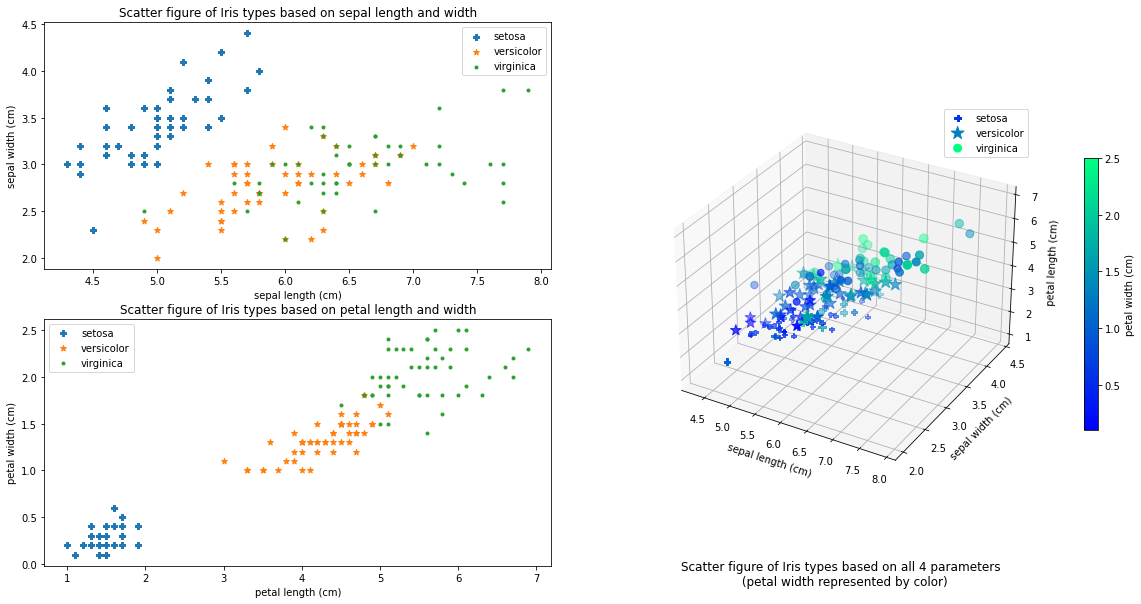

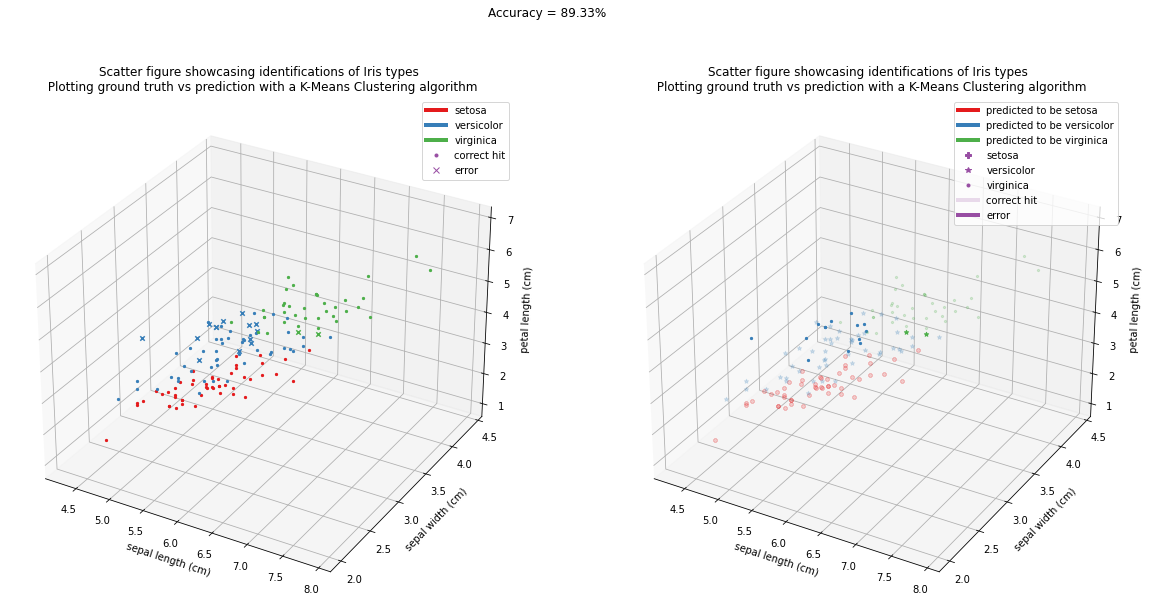

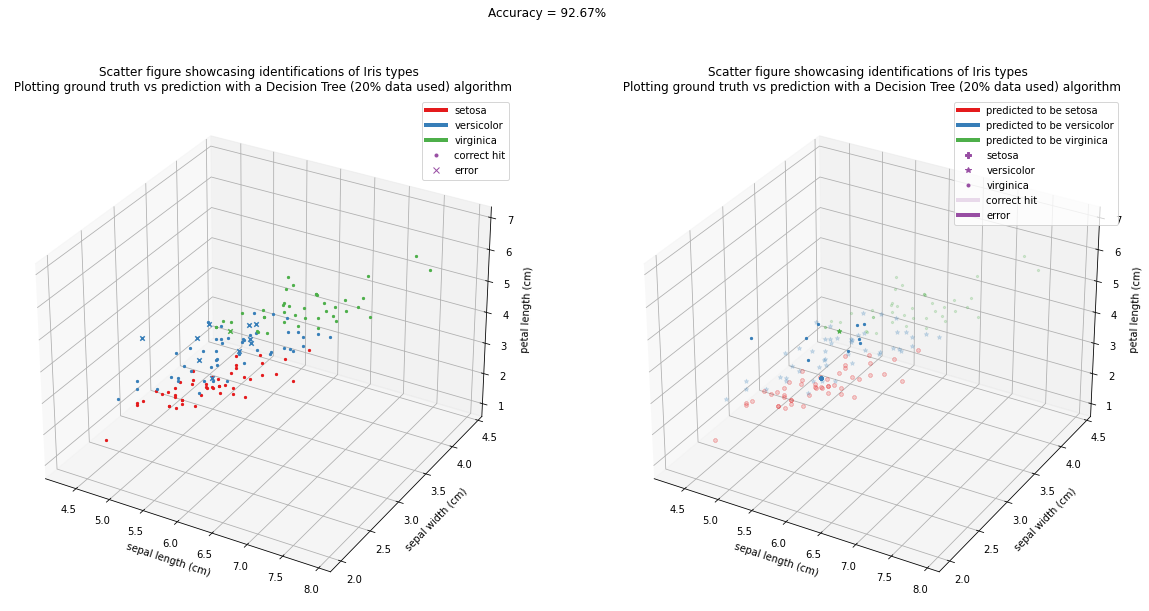

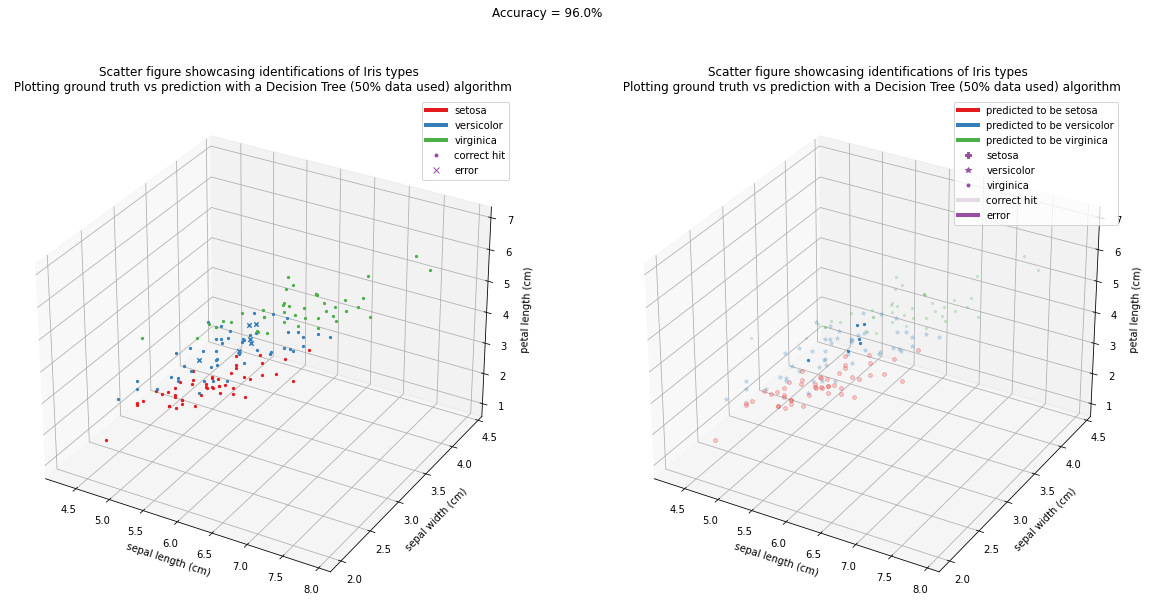

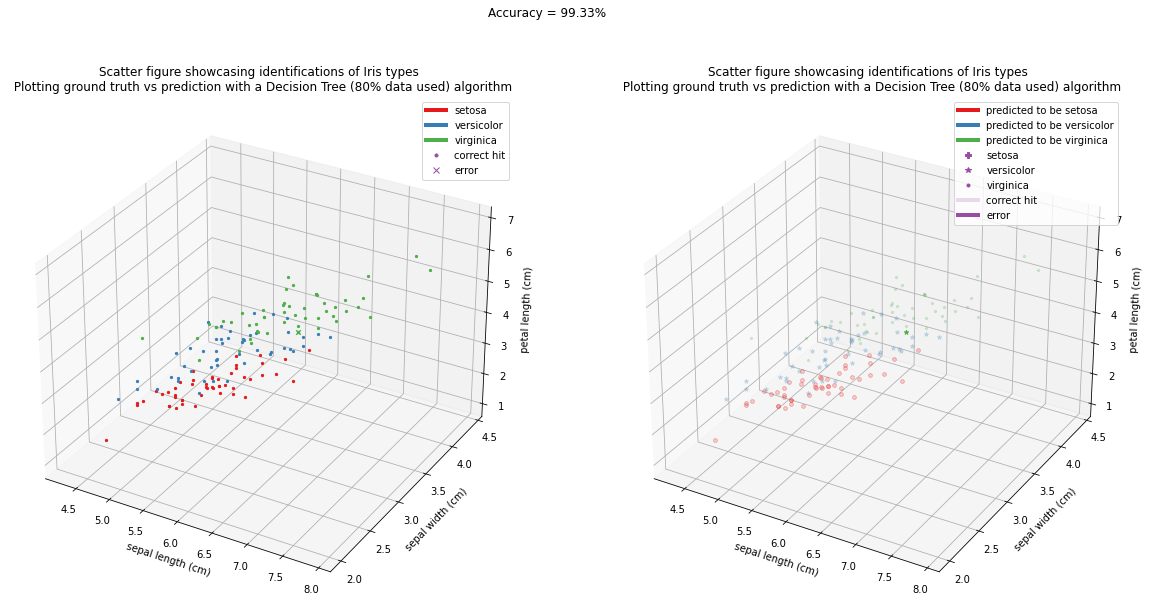

In [46]:
show_default_scatter()
plot_compare(group_k_means_cluster(), "K-Means Clustering")
decision_tree_data_splits = [0.2, 0.5, 0.8]
for split in decision_tree_data_splits:
    plot_compare(decision_tree(split_ratio=split), "Decision Tree (" + str(int(split*100)) + "% data used)")

benchmark

In [47]:
def benchmark_alg(loops):
    """
    benchmark the various algorithms
    :param loops: number of loops to average over
    :return: None
    """
    print ("Algorithm, avg mistakes(absolute), avg time (s)")
    total = 0
    t = time.process_time()
    for i in range(loops):
        total += count_nonzero(group_k_means_cluster(i) - iris.target)
    print("Kmeans " + str(total / loops) + " " + str((time.process_time() - t)/loops))

    total = 0
    t = time.process_time()
    for i in range(loops):
        total += count_nonzero(group_spectral_cluster(i) - iris.target)
    print("Kmeans-based Spectral Cluster " + str(total / loops) + " " + str((time.process_time() - t)/loops))

    total = 0
    t = time.process_time()
    for i in range(loops):
        total += count_nonzero(group_spectral_cluster(i,"discretize") - iris.target)
    print("discretization-based spectral cluster " + str(total / loops) + " " + str((time.process_time() - t)/loops))

    total = 0
    t = time.process_time()
    for i in range(loops):
        total += count_nonzero(group_density_scan() - iris.target)
    print("DBSCAN " + str(total / loops) + " " + str((time.process_time() - t)/loops))

    for pct in decision_tree_data_splits:
        total = 0
        t = time.process_time()
        for i in range(loops):
            total += count_nonzero(decision_tree() - iris.target)
        print("decision_tree(" + str(int(100 * pct)) + "%) " + str(total / loops) + " " + str((time.process_time() - t) / loops))

extras

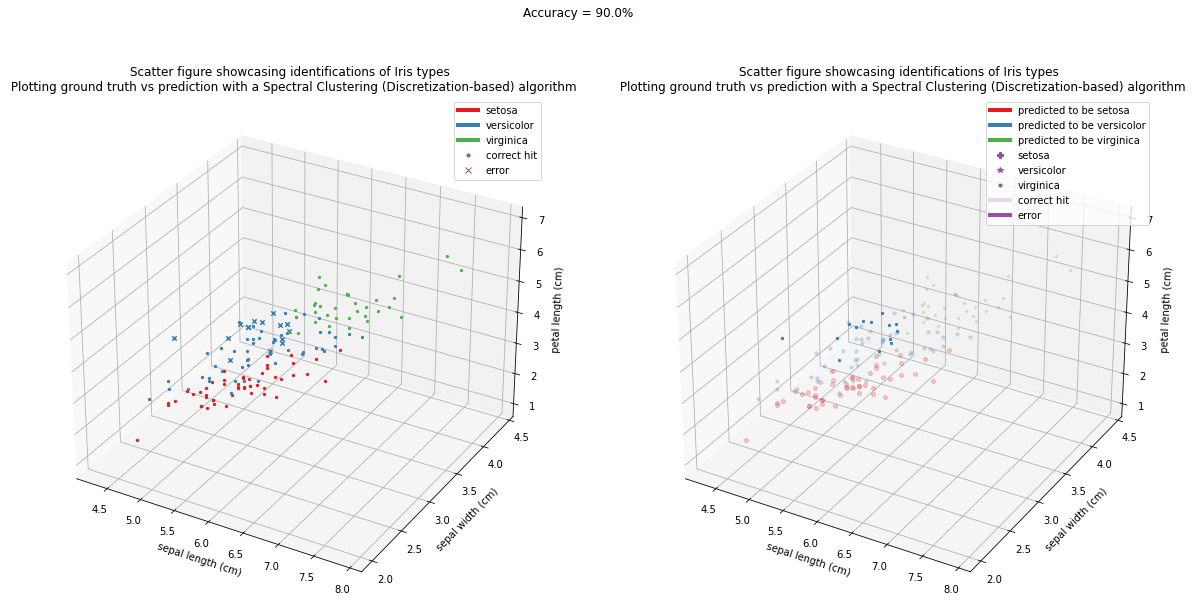

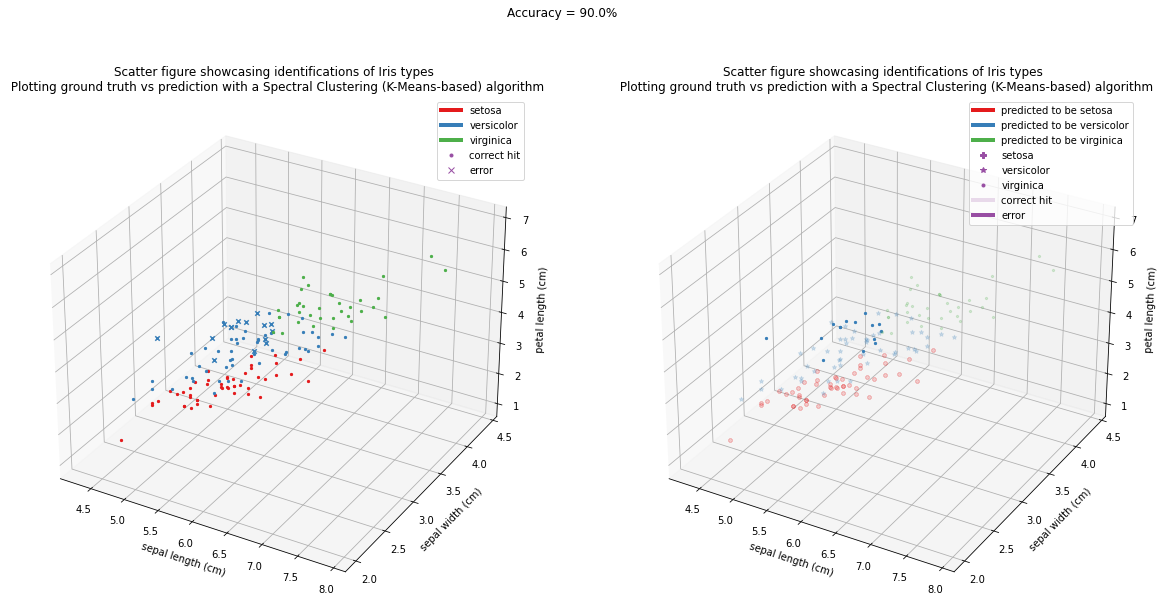

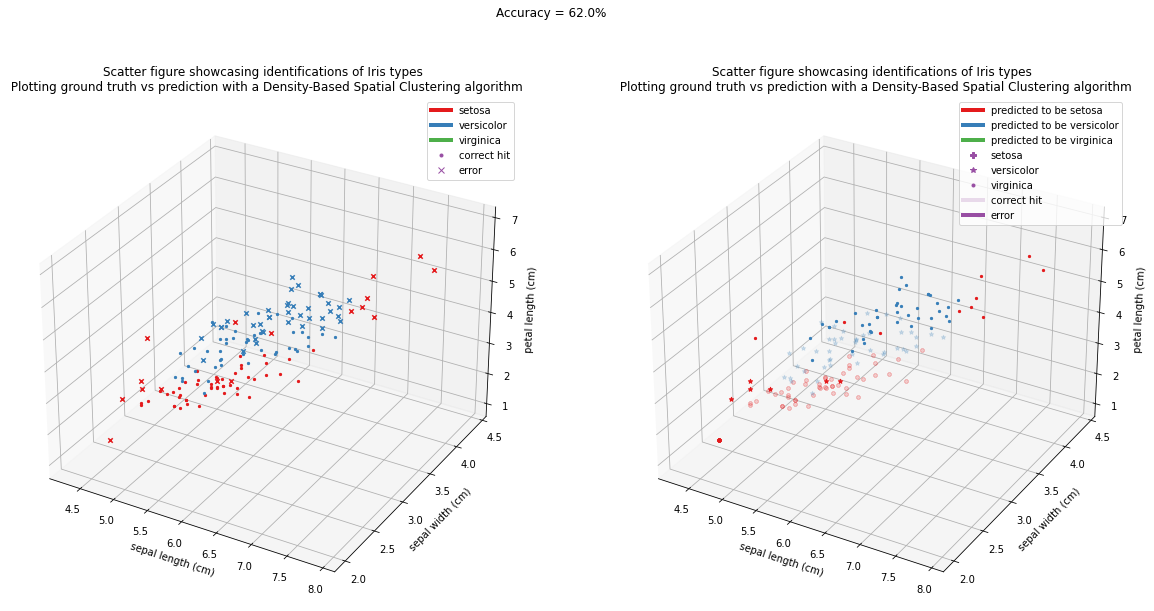

In [48]:
plot_compare(group_spectral_cluster(), "Spectral Clustering (Discretization-based)")
plot_compare(group_spectral_cluster(), "Spectral Clustering (K-Means-based)")
plot_compare(group_density_scan(), "Density-Based Spatial Clustering")

benchmark

In [49]:
benchmark_alg(100)

Algorithm, avg mistakes(absolute), avg time (s)
Kmeans 54.08 0.244375
Kmeans-based Spectral Cluster 54.2 1.95359375
discretization-based spectral cluster 43.0 0.0478125
DBSCAN 57.0 0.00125
decision_tree(20%) 1.0 0.000625
decision_tree(50%) 1.0 0.00078125
decision_tree(80%) 1.0 0.000625
